# JPX Tokyo Stock Exchange Prediction Software


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn as sk
import tensorflow as tf

In [2]:
path = "../jpx-tokyo-stock-exchange-prediction"
df_prices = pd.read_csv(path+"/train_files/stock_prices.csv")
df_finantials = pd.read_csv(path+"/train_files/financials.csv")
df_options = pd.read_csv(path+"/train_files/options.csv")
df_secondary_stock_prices = pd.read_csv(path+"/train_files/secondary_stock_prices.csv")
df_trades = pd.read_csv(path+"/train_files/trades.csv")

train_files = [df_prices, df_finantials, df_options, df_secondary_stock_prices, df_trades]

C:\Users\javie\AppData\Local\Temp\ipykernel_10332\2910302282.py:3: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_finantials = pd.read_csv(path+"/train_files/financials.csv")
C:\Users\javie\AppData\Local\Temp\ipykernel_10332\2910302282.py:4: DtypeWarning: Columns (7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_options = pd.read_csv(path+"/train_files/options.csv")


In [3]:
for df in train_files:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   RowId             object 
 1   Date              object 
 2   SecuritiesCode    int64  
 3   Open              float64
 4   High              float64
 5   Low               float64
 6   Close             float64
 7   Volume            int64  
 8   AdjustmentFactor  float64
 9   ExpectedDividend  float64
 10  SupervisionFlag   bool   
 11  Target            float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 198.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92956 entries, 0 to 92955
Data columns (total 45 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   DisclosureNumber                                    

In [4]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   RowId             object 
 1   Date              object 
 2   SecuritiesCode    int64  
 3   Open              float64
 4   High              float64
 5   Low               float64
 6   Close             float64
 7   Volume            int64  
 8   AdjustmentFactor  float64
 9   ExpectedDividend  float64
 10  SupervisionFlag   bool   
 11  Target            float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 198.0+ MB


In [5]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   RowId             object 
 1   Date              object 
 2   SecuritiesCode    int64  
 3   Open              float64
 4   High              float64
 5   Low               float64
 6   Close             float64
 7   Volume            int64  
 8   AdjustmentFactor  float64
 9   ExpectedDividend  float64
 10  SupervisionFlag   bool   
 11  Target            float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 198.0+ MB


array([[<AxesSubplot:title={'center':'SecuritiesCode'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'AdjustmentFactor'}>,
        <AxesSubplot:title={'center':'ExpectedDividend'}>,
        <AxesSubplot:title={'center':'Target'}>]], dtype=object)

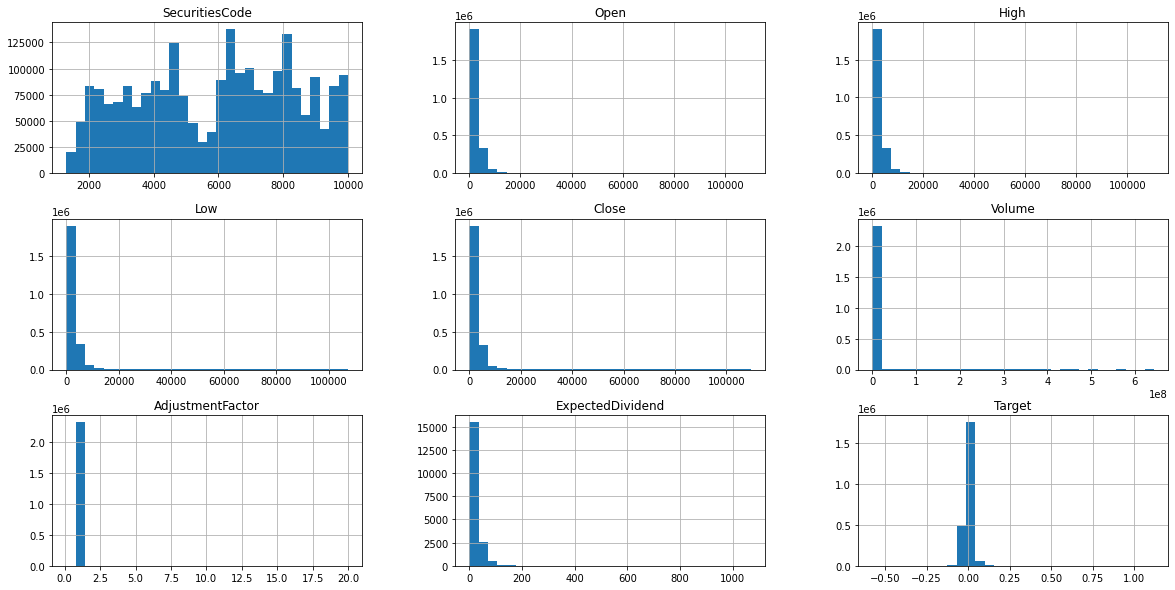

In [6]:
df_prices.hist(figsize=(20,10), bins=30)

array([[<AxesSubplot:title={'center':'DisclosureNumber'}>,
        <AxesSubplot:title={'center':'SecuritiesCode'}>],
       [<AxesSubplot:title={'center':'DisclosedUnixTime'}>,
        <AxesSubplot:>]], dtype=object)

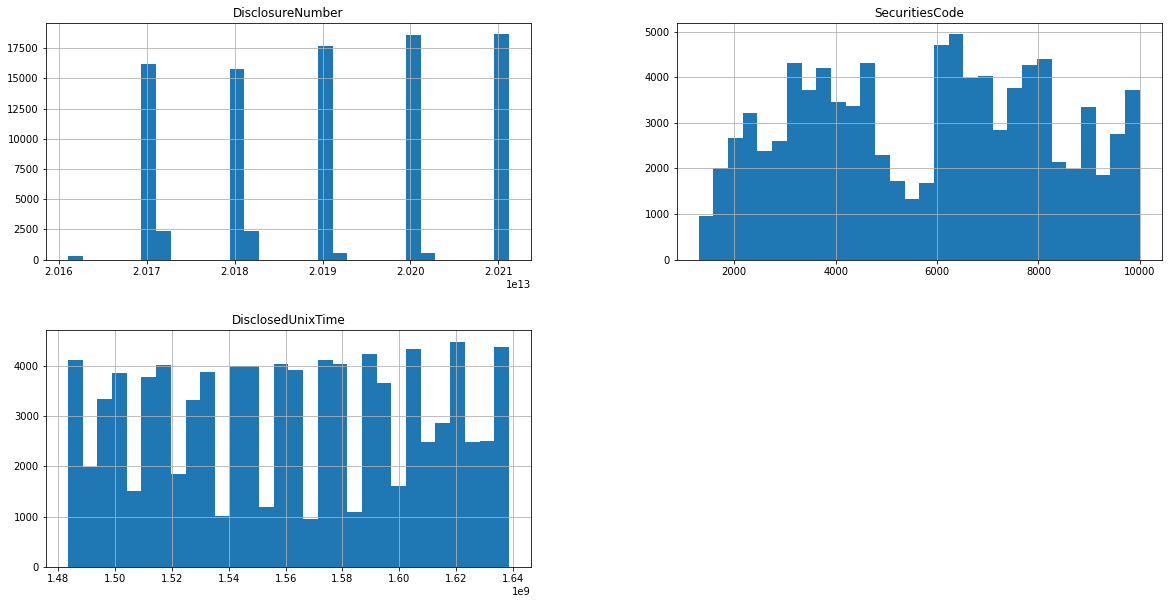

In [7]:

df_finantials.hist(figsize=(20,10), bins=30)


array([[<AxesSubplot:title={'center':'OptionsCode'}>,
        <AxesSubplot:title={'center':'WholeDayOpen'}>,
        <AxesSubplot:title={'center':'WholeDayHigh'}>,
        <AxesSubplot:title={'center':'WholeDayLow'}>,
        <AxesSubplot:title={'center':'WholeDayClose'}>],
       [<AxesSubplot:title={'center':'DaySessionOpen'}>,
        <AxesSubplot:title={'center':'DaySessionHigh'}>,
        <AxesSubplot:title={'center':'DaySessionLow'}>,
        <AxesSubplot:title={'center':'DaySessionClose'}>,
        <AxesSubplot:title={'center':'TradingVolume'}>],
       [<AxesSubplot:title={'center':'OpenInterest'}>,
        <AxesSubplot:title={'center':'TradingValue'}>,
        <AxesSubplot:title={'center':'ContractMonth'}>,
        <AxesSubplot:title={'center':'StrikePrice'}>,
        <AxesSubplot:title={'center':'WholeDayVolume'}>],
       [<AxesSubplot:title={'center':'Putcall'}>,
        <AxesSubplot:title={'center':'LastTradingDay'}>,
        <AxesSubplot:title={'center':'SpecialQuotationD

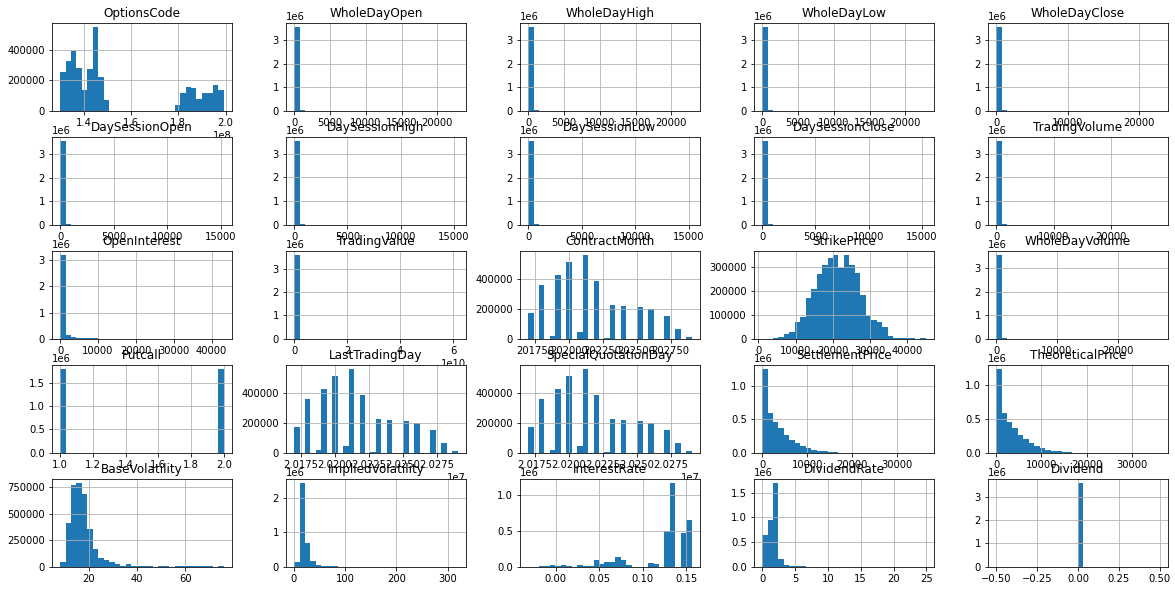

In [8]:
df_options.hist(figsize=(20,10), bins=30)


array([[<AxesSubplot:title={'center':'SecuritiesCode'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'AdjustmentFactor'}>,
        <AxesSubplot:title={'center':'ExpectedDividend'}>,
        <AxesSubplot:title={'center':'Target'}>]], dtype=object)

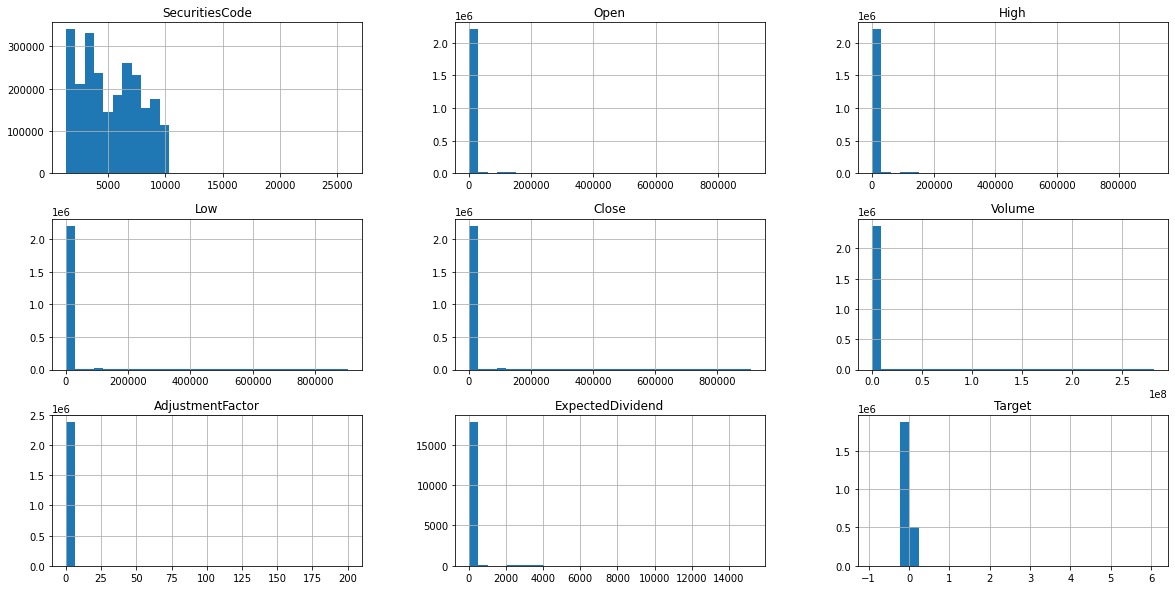

In [9]:
df_secondary_stock_prices.hist(figsize=(20,10), bins=30)


In [10]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   RowId             object 
 1   Date              object 
 2   SecuritiesCode    int64  
 3   Open              float64
 4   High              float64
 5   Low               float64
 6   Close             float64
 7   Volume            int64  
 8   AdjustmentFactor  float64
 9   ExpectedDividend  float64
 10  SupervisionFlag   bool   
 11  Target            float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 198.0+ MB


In [11]:
df_prices.columns

Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')

In [12]:
# Estadísticas de Stock_prices
SecuritiesCode = df_prices['SecuritiesCode'].describe()
Open = df_prices['Open'].describe()
Close = df_prices['Close'].describe()
Low = df_prices['Low'].describe()
High = df_prices['High'].describe()
Volume = df_prices['Volume'].describe()
AdjustmentFactor = df_prices['AdjustmentFactor'].describe()
ExpectedDividend = df_prices['ExpectedDividend'].describe()
SupervisionFlag = df_prices['SupervisionFlag'].describe()
Target = df_prices['Target'].describe()

In [13]:
# Securities Code
unique_securities = pd.unique(df_prices['SecuritiesCode'])
unique_securities.size

2000

In [14]:
# Open
print('OPEN')
print("Count:   " + str(Open['count']))
print("Mean:    " + str(Open['mean']))
print("Std:     " + str(Open['std']))
print("Max:     " + str(Open['max']))
print("Min:     " + str(Open['min']))

# Close
print('\nCLOSE')
print("Count:   " + str(Close['count']))
print("Mean:    " + str(Close['mean']))
print("Std:     " + str(Close['std']))
print("Max:     " + str(Close['max']))
print("Min:     " + str(Close['min']))

print('\nOPEN - CLOSE')
print('Mean dif.: '+ str(Open['mean']-Close['mean']))
print('Std dif.: '+ str(Open['std']-Close['std']))
print('Max dif.: '+ str(Open['max']-Close['max']))
print('Min dif.: '+ str(Open['min']-Close['min']))

OPEN
Count:   2324923.0
Mean:    2594.510782808721
Std:     3577.191908793738
Max:     109950.0
Min:     14.0

CLOSE
Count:   2324923.0
Mean:    2594.0234464539253
Std:     3576.5384018244717
Max:     109550.0
Min:     14.0

OPEN - CLOSE
Mean dif.: 0.48733635479584336
Std dif.: 0.6535069692663455
Max dif.: 400.0
Min dif.: 0.0


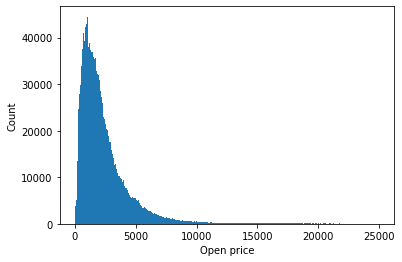

In [15]:
histOpen = plt.hist(df_prices['Open'], bins=500, range=[0,25000], label='Open Prices')
plt.xlabel('Open price')
plt.ylabel('Count')
plt.show(histOpen)


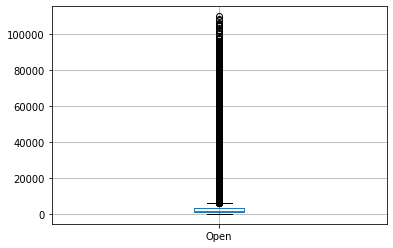

In [16]:
boxOpen = df_prices.boxplot(column=['Open'])

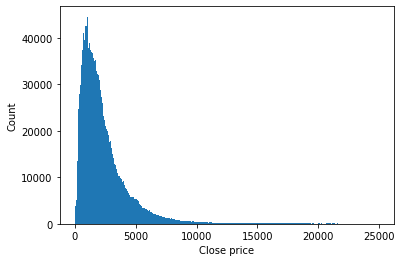

In [17]:
figClose = plt.hist(df_prices['Close'], bins=500, range=[0,25000], label='Close Prices')
plt.xlabel('Close price')
plt.ylabel('Count')
plt.show(figClose)

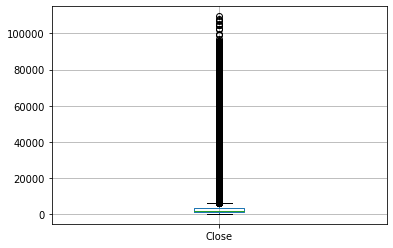

In [18]:
boxClose = df_prices.boxplot(column=['Close'])

In [19]:
# High
print('HIGH')
print("Count:   " + str(High['count']))
print("Mean:    " + str(High['mean']))
print("Std:     " + str(High['std']))
print("Max:     " + str(High['max']))
print("Min:     " + str(High['min']))

# Low
print('\nLOW')
print("Count:   " + str(Low['count']))
print("Mean:    " + str(Low['mean']))
print("Std:     " + str(Low['std']))
print("Max:     " + str(Low['max']))
print("Min:     " + str(Low['min']))

print('\nHIGH - LOW')
print('Mean dif.: '+ str(High['mean']-Low['mean']))
print('Std dif.: '+ str(High['std']-Low['std']))
print('Max dif.: '+ str(High['max']-Low['max']))
print('Min dif.: '+ str(High['min']-Low['min']))

HIGH
Count:   2324923.0
Mean:    2626.5396817442997
Std:     3619.3632184819685
Max:     110500.0
Min:     15.0

LOW
Count:   2324923.0
Mean:    2561.2270390460208
Std:     3533.494079555893
Max:     107200.0
Min:     13.0

HIGH - LOW
Mean dif.: 65.31264269827898
Std dif.: 85.86913892607527
Max dif.: 3300.0
Min dif.: 2.0


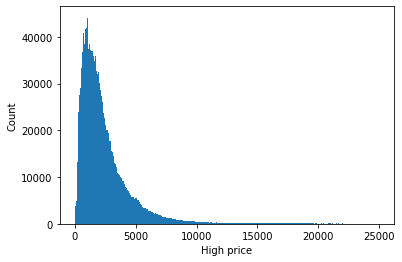

In [20]:
figHigh = plt.hist(df_prices['High'], bins=500, range=[0,25000], label='High Prices')
plt.xlabel('High price')
plt.ylabel('Count')
plt.show(figHigh)

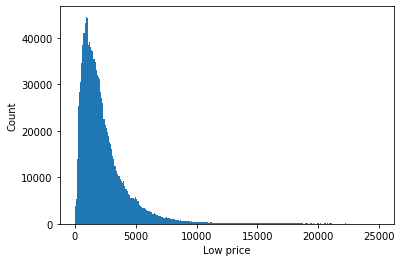

In [21]:
figLow = plt.hist(df_prices['Low'], bins=500, range=[0,25000], label='Low Prices')
plt.xlabel('Low price')
plt.ylabel('Count')
plt.show(figLow)

VOLUME
Count:   2332531.0
Mean:    691936.5565559472
Std:     3911255.9374473062
Max:     643654000.0
Min:     0.0


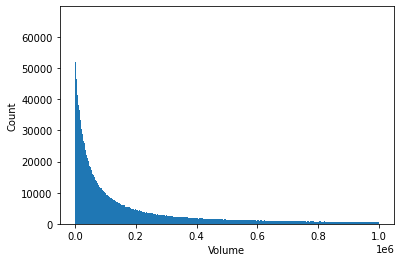

In [22]:
# Volume
print('VOLUME')
print("Count:   " + str(Volume['count']))
print("Mean:    " + str(Volume['mean']))
print("Std:     " + str(Volume['std']))
print("Max:     " + str(Volume['max']))
print("Min:     " + str(Volume['min']))

figVolume = plt.hist(df_prices['Volume'], bins=500, range=[0,1000000], label='Volume')
plt.xlabel('Volume')
plt.ylabel('Count')
plt.show(figVolume)

ADJUSTEMENT FACTOR
Count:   2332531.0
Mean:    1.0005076284912215
Std:     0.06773040255160938
Max:     20.0
Min:     0.1


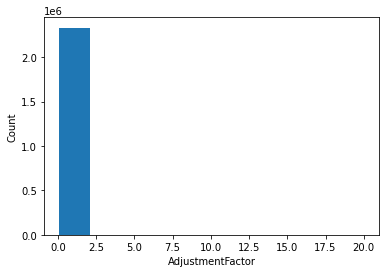

In [23]:
# Adjustement Factor
print('ADJUSTEMENT FACTOR')
print("Count:   " + str(AdjustmentFactor['count']))
print("Mean:    " + str(AdjustmentFactor['mean']))
print("Std:     " + str(AdjustmentFactor['std']))
print("Max:     " + str(AdjustmentFactor['max']))
print("Min:     " + str(AdjustmentFactor['min']))

figAdjustmentFactor = plt.hist(df_prices['AdjustmentFactor'], label='AdjustmentFactor')
plt.xlabel('AdjustmentFactor')
plt.ylabel('Count')
plt.show(figAdjustmentFactor)

EXPECTED DIVIDEND
Count:   18865.0
Mean:    22.01773018817916
Std:     29.88245323611041
Max:     1070.0
Min:     0.0


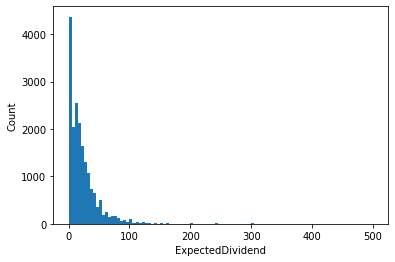

In [24]:
# Expected dividend
print('EXPECTED DIVIDEND')
print("Count:   " + str(ExpectedDividend['count']))
print("Mean:    " + str(ExpectedDividend['mean']))
print("Std:     " + str(ExpectedDividend['std']))
print("Max:     " + str(ExpectedDividend['max']))
print("Min:     " + str(ExpectedDividend['min']))

figExpectedDividend = plt.hist(df_prices['ExpectedDividend'], bins=100, range=[0,500], label='ExpectedDividend')
plt.xlabel('ExpectedDividend')
plt.ylabel('Count')
plt.show(figExpectedDividend)

TARGET
Count:   2332293.0
Mean:    0.00044509644528956647
Std:     0.023398792332583702
Max:     1.119512195121951
Min:     -0.5785413744740533


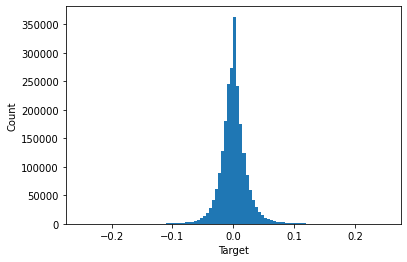

In [25]:
# Target
print('TARGET')
print("Count:   " + str(Target['count']))
print("Mean:    " + str(Target['mean']))
print("Std:     " + str(Target['std']))
print("Max:     " + str(Target['max']))
print("Min:     " + str(Target['min']))

figTarget = plt.hist(df_prices['Target'], bins=100, range=[-0.25, 0.25], label='Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show(figTarget)

In [26]:
df_trades
          
          

Date   StartDate     EndDate                           Section  \
0     2017-01-04         NaN         NaN                               NaN   
1     2017-01-05         NaN         NaN                               NaN   
2     2017-01-06         NaN         NaN                               NaN   
3     2017-01-10         NaN         NaN                               NaN   
4     2017-01-11         NaN         NaN                               NaN   
...          ...         ...         ...                               ...   
1707  2021-12-01         NaN         NaN                               NaN   
1708  2021-12-02  2021-11-22  2021-11-26    Growth Market (Mothers/JASDAQ)   
1709  2021-12-02  2021-11-22  2021-11-26      Prime Market (First Section)   
1710  2021-12-02  2021-11-22  2021-11-26  Standard Market (Second Section)   
1711  2021-12-03         NaN         NaN                               NaN   

        TotalSales  TotalPurchases    TotalTotal  TotalBalance  \
0              NaN             NaN           NaN           NaN   
1              NaN             NaN           NaN           NaN   
2              NaN             NaN           NaN           NaN   
3              NaN             NaN           NaN           NaN   
4              NaN             NaN           NaN           NaN   
...            ...             ...           ...           ...   
1707           NaN             NaN           NaN           NaN   
1708  1.143466e+09    1.143923e+09  2.287389e+09      456677.0   
1709  1.138343e+10    1.137621e+10  2.275964e+10    -7214179.0   
1710  1.069969e+08    1.075036e+08  2.145004e+08      506702.0   
1711           NaN             NaN           NaN           NaN   

      ProprietarySales  ProprietaryPurchases  ...  CityBKsRegionalBKsEtcTotal  \
0                  NaN                   NaN  ...                         NaN   
1                  NaN                   NaN  ...                         NaN   
2                  NaN                   NaN  ...                         NaN   
3                  NaN                   NaN  ...                         NaN   
4                  NaN                   NaN  ...                         NaN   
...                ...                   ...  ...                         ...   
1707               NaN                   NaN  ...                         NaN   
1708      3.663919e+07          3.496068e+07  ...                    396230.0   
1709      1.499660e+09          1.230944e+09  ...                  35957940.0   
1710      2.811025e+06          3.273163e+06  ...                     42127.0   
1711               NaN                   NaN  ...                         NaN   

      CityBKsRegionalBKsEtcBalance  TrustBanksSales  TrustBanksPurchases  \
0                              NaN              NaN                  NaN   
1                              NaN              NaN                  NaN   
2                              NaN              NaN                  NaN   
3                              NaN              NaN                  NaN   
4                              NaN              NaN                  NaN   
...                            ...              ...                  ...   
1707                           NaN              NaN                  NaN   
1708                     -275608.0        6696755.0            6886122.0   
1709                   -17510292.0      254580089.0          261919512.0   
1710                      -42127.0         438928.0             243817.0   
1711                           NaN              NaN                  NaN   

      TrustBanksTotal  TrustBanksBalance  OtherFinancialInstitutionsSales  \
0                 NaN                NaN                              NaN   
1                 NaN                NaN                              NaN   
2                 NaN                NaN                              NaN   
3                 NaN                NaN                              NaN   
4          

In [27]:
df_options

DateCode        Date  OptionsCode  WholeDayOpen  \
0        20170104_132010018  2017-01-04    132010018         650.0   
1        20170104_132010118  2017-01-04    132010118           0.0   
2        20170104_132010218  2017-01-04    132010218           0.0   
3        20170104_132010318  2017-01-04    132010318           0.0   
4        20170104_132010518  2017-01-04    132010518           0.0   
...                     ...         ...          ...           ...   
3567689  20211203_199244018  2021-12-03    199244018           0.0   
3567690  20211203_199245018  2021-12-03    199245018           0.0   
3567691  20211203_199246018  2021-12-03    199246018           0.0   
3567692  20211203_199247018  2021-12-03    199247018           0.0   
3567693  20211203_199248018  2021-12-03    199248018           0.0   

         WholeDayHigh  WholeDayLow  WholeDayClose NightSessionOpen  \
0               650.0        480.0          480.0           0.0000   
1                 0.0          0.0            0.0           0.0000   
2                 0.0          0.0            0.0           0.0000   
3                 0.0          0.0            0.0           0.0000   
4                 0.0          0.0            0.0           0.0000   
...               ...          ...            ...              ...   
3567689           0.0          0.0            0.0           0.0000   
3567690           0.0          0.0            0.0           0.0000   
3567691           0.0          0.0            0.0           0.0000   
3567692           0.0          0.0            0.0           0.0000   
3567693           0.0          0.0            0.0           0.0000   

        NightSessionHigh NightSessionLow  ... Putcall  LastTradingDay  \
0                 0.0000          0.0000  ...       1        20170112   
1                 0.0000          0.0000  ...       1        20170112   
2                 0.0000          0.0000  ...       1        20170112   
3                 0.0000          0.0000  ...       1        20170112   
4                 0.0000          0.0000  ...       1        20170112   
...                  ...             ...  ...     ...             ...   
3567689           0.0000          0.0000  ...       2        20241212   
3567690           0.0000          0.0000  ...       2        20241212   
3567691           0.0000          0.0000  ...       2        20241212   
3567692           0.0000          0.0000  ...       2        20241212   
3567693           0.0000          0.0000  ...       2        20241212   

         SpecialQuotationDay  SettlementPrice  TheoreticalPrice  \
0                   20170113            480.0          478.4587   
1                   20170113            575.0          571.1385   
2                   20170113            680.0          677.3710   
3                   20170113            795.0          791.0383   
4                   20170113            910.0          909.9947   
...                      ...              ...               ...   
3567689             20241213            335.0          368.5305   
3567690             20241213           1160.0         1253.3703   
3567691             20241213           1015.0         1097.0436   
3567692             20241213            885.0          959.3328   
3567693             20241213            770.0          838.2266   

         BaseVolatility  ImpliedVolatility  InterestRate  DividendRate  \
0              17.47360            17.5865        0.0091           0.0   
1              17.47360            16.5000        0.0091           0.0   
2              17.47360            15.8644        0.0091           0.0   
3              17.47360            15.2288        0.0091           0.0   
4              17.47360            14.5932        0.0091           0.0   
...                 ...                ...           ...           ...   
3567689        24.70275            19.2442        0.1564           0.0   
3567690        24.70275            19.0517        0.1564       

In [28]:
df_trades['Target']

KeyError: 'Target'

In [ ]:
df_finantials.columns

Index(['DisclosureNumber', 'DateCode', 'Date', 'SecuritiesCode',
       'DisclosedDate', 'DisclosedTime', 'DisclosedUnixTime', 'TypeOfDocument',
       'CurrentPeriodEndDate', 'TypeOfCurrentPeriod',
       'CurrentFiscalYearStartDate', 'CurrentFiscalYearEndDate', 'NetSales',
       'OperatingProfit', 'OrdinaryProfit', 'Profit', 'EarningsPerShare',
       'TotalAssets', 'Equity', 'EquityToAssetRatio', 'BookValuePerShare',
       'ResultDividendPerShare1stQuarter', 'ResultDividendPerShare2ndQuarter',
       'ResultDividendPerShare3rdQuarter',
       'ResultDividendPerShareFiscalYearEnd', 'ResultDividendPerShareAnnual',
       'ForecastDividendPerShare1stQuarter',
       'ForecastDividendPerShare2ndQuarter',
       'ForecastDividendPerShare3rdQuarter',
       'ForecastDividendPerShareFiscalYearEnd',
       'ForecastDividendPerShareAnnual', 'ForecastNetSales',
       'ForecastOperatingProfit', 'ForecastOrdinaryProfit', 'ForecastProfit',
       'ForecastEarningsPerShare',
       'ApplyingOf

In [ ]:
df_finantials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92956 entries, 0 to 92955
Data columns (total 45 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   DisclosureNumber                                                              92954 non-null  float64
 1   DateCode                                                                      92954 non-null  object 
 2   Date                                                                          92956 non-null  object 
 3   SecuritiesCode                                                                92954 non-null  float64
 4   DisclosedDate                                                                 92954 non-null  object 
 5   DisclosedTime                                                                 92954 non-null  object 
 6   DisclosedUnixTime             

In [ ]:
df_finantials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92956 entries, 0 to 92955
Data columns (total 45 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   DisclosureNumber                                                              92954 non-null  float64
 1   DateCode                                                                      92954 non-null  object 
 2   Date                                                                          92956 non-null  object 
 3   SecuritiesCode                                                                92954 non-null  float64
 4   DisclosedDate                                                                 92954 non-null  object 
 5   DisclosedTime                                                                 92954 non-null  object 
 6   DisclosedUnixTime             

NameError: name 'df_prices' is not defined